In [5]:

import pandas as pd
import matplotlib.pyplot as plt

In [40]:
features_path = "features.csv"
data = pd.read_csv(features_path,header=None)


In [48]:
from sklearn.model_selection import train_test_split
def data_split(data):
    # Shuffle the dataset
    data = data.sample(frac=1).reset_index(drop=True)

    # Split into train and test sets
    train, test = train_test_split(data, test_size=0.2)

    # Split the train set into train and validation sets
    train, validation = train_test_split(train, test_size=0.2)

    train.to_csv('train.csv', index=False, header=None)
    test.to_csv('test.csv', index=False, header=None)
    validation.to_csv('validation.csv', index=False, header=None)

In [50]:
data_split(data)
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_valid = pd.read_csv("validation.csv")

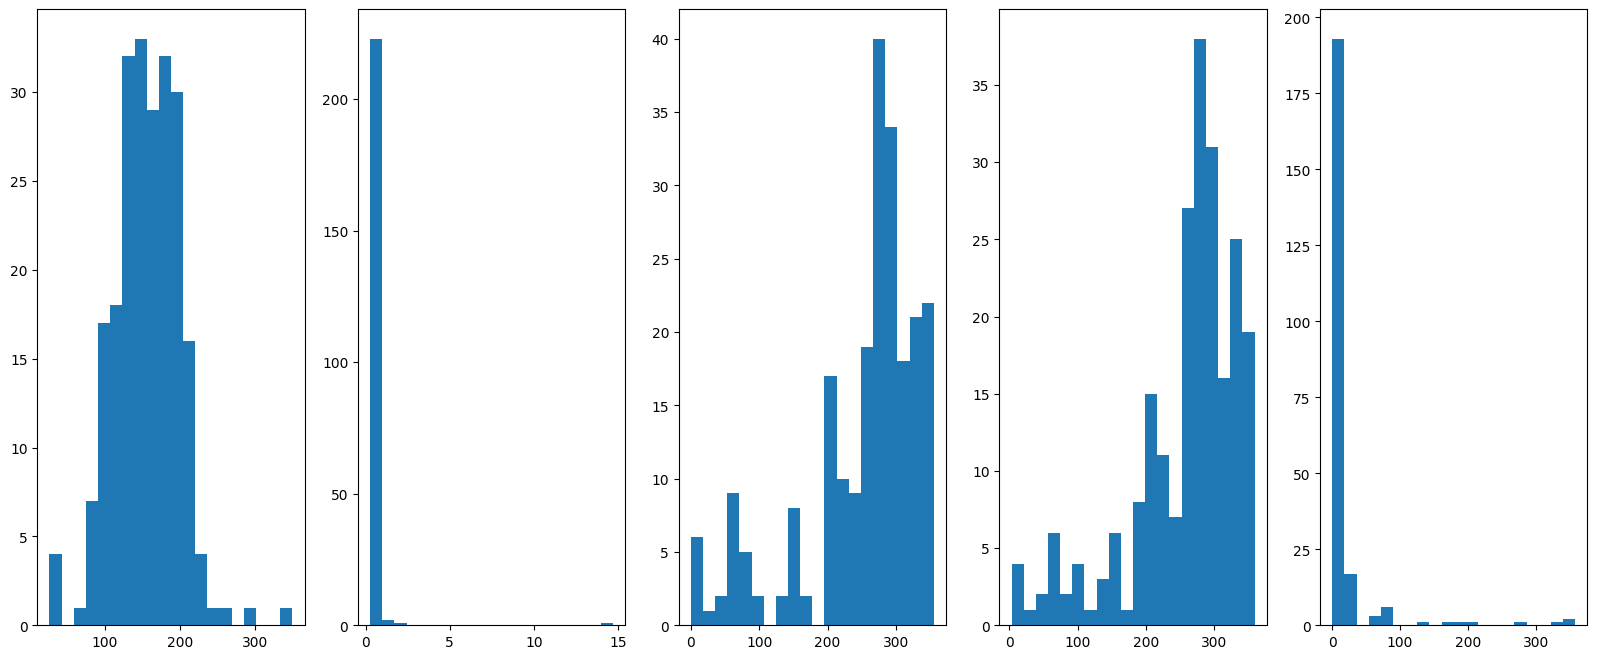

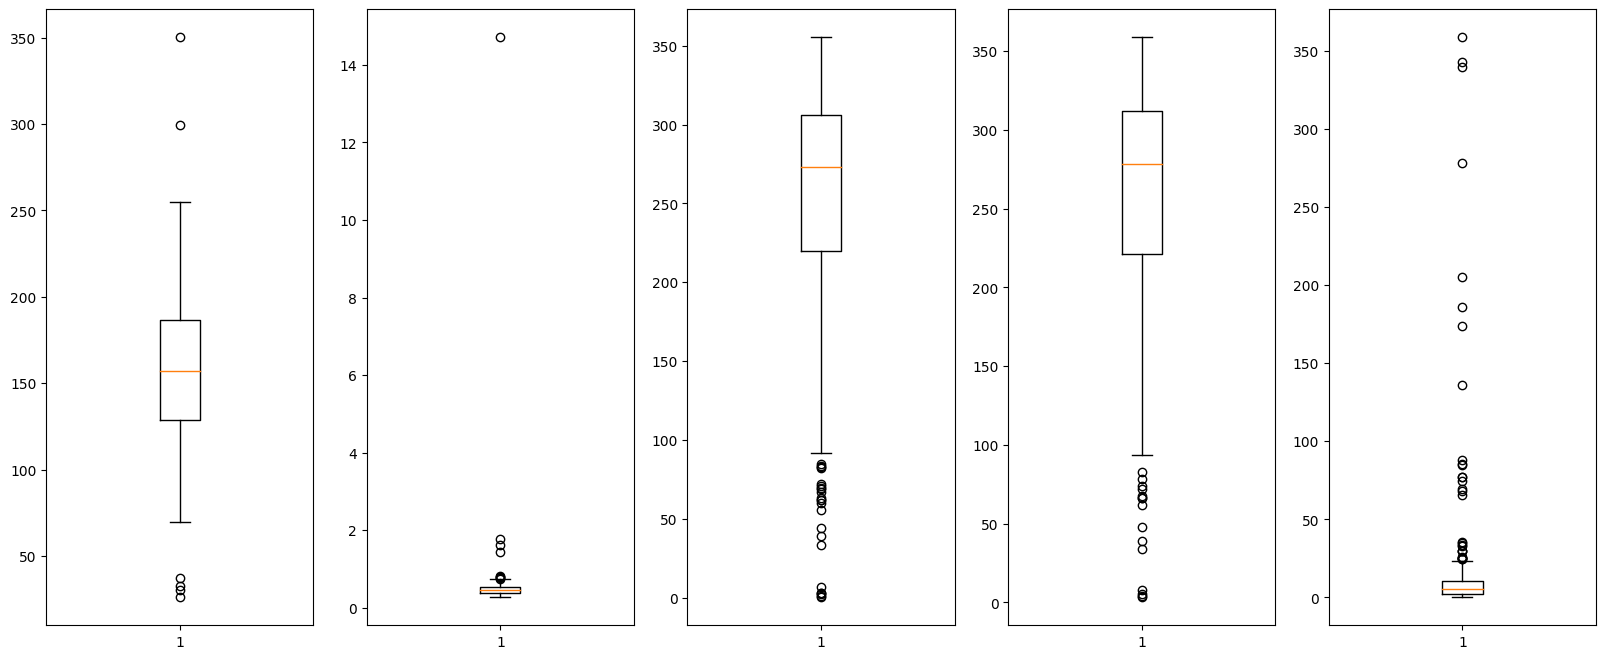

In [38]:
fig1, axs1 = plt.subplots(1, 5,figsize=(20, 8))
fig2, axs2 = plt.subplots(1, 5,figsize=(20, 8))
for i in range(5):
    axs1[i].hist(data[i], bins=20)
    axs2[i].hist(data[i], bins=20)

In [38]:
# Xử lí ngoại lệ
# Vì phân phối góc giữa đầu và vai có dạng phân phối chuẩn nên dùng phương pháp Gaussion dist
# Các đặt trưng còn lại dùng phương pháp Skewed dist

def OutlierProcessing_Gaussiondist(feature):
    upper_boundary  = feature.mean() + 3*feature.std()
    lower_boundary  = feature.mean() - 3*feature.std()
    feature = feature.mask(feature >= upper_boundary,upper_boundary)
    feature = feature.mask(data['Age'] <= lower_boundary,lower_boundary)
def OutlierProcessing_Skeweddist(feature):
    IQR=feature.quantile(0.75) - feature.quantile(0.25)
    upper_boundary  =feature.quantile(0.75) + 3*IQR
    lower_boundary  =feature.quantile(0.75) - 3*IQR
    feature = feature.mask(feature >= upper_boundary,upper_boundary)
    feature = feature.mask(feature <= lower_boundary,lower_boundary)

In [7]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
print(scaler)


print(scaler.mean_)


print(scaler.scale_)


X_scaled = scaler.transform(X_train)
X_scaled


StandardScaler()
[1.         0.         0.33333333]
[0.81649658 0.81649658 1.24721913]


array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])